# La convolution
Il existe plusieurs opérations permettant de manipuler des images, l'une des plus utilisées est la convolution. Pour rappel, l'opération de convolution pour un signal __discret__ se définit comme: $$[f*g](n)=\sum _{i=-inf}^{+inf} f(i) g(n-i)=\sum _{i=-inf}^{+inf} g(i) f(n-i)$$
Dans le cas d'une image, le signal est en 2 dimensions et la formule se réécrit comme:
$$[f*g](m,n)=\sum _{i=-inf}^{+inf}\sum _{j=-inf}^{+inf} f(i,j) g(m-i,n-j)=\sum _{i=-inf}^{+inf} g(i,j) f(m-i,n-j)$$

Ici, f représente l'image qui va subir l'opération et g est ce qu'on appelle le __kernel__.

En pratique, cette formule mathémtique se traduit assez simplement, comme le montre l'image suivante:
![SegmentLocal](3D_Convolution_Animation.gif "segment")

Le kernel est une fenêtre qui coulisse sur chacun des pixels de l'image f. Le nouveau pixel obtenu est une combinaison linéaire de l'ancien pixel ainsi que de ses proches voisins (en fonction de la dimension du kernel). Les coefficients de la combinaison linéaire sont le kernel g. Lorsque l'image est une image en _grayscale_, il ne faut faire l'opération qu'une fois, mais lorsque c'est une image RGB, il faut appliquer l'opération sur chacun des _canaux_.

Il existe quelque contrainte sur les kernels utilisés: la dimension du kernel doit être impaire et plus petite que celle de l'image (par exemple 3x3) et on normalise les coefficients du kernel afin que leur somme fasse 0,1 ou -1. Il faut aussi décider ce qu'il se passe sur les bords, 3 possibilités: dupliquer les pixels sur les bords pour appliquer la convolution (voir image), mettre ces coefficients à 0 ou ne pas faire la convolution sur les bords. 

La première utilisation de cette opération de convolution est le __filtre de convolution__.


## Filtre de convolution
Nous allons implémenter l'opération de convolution et tester le filtre de convolution avec différents kernels afin d'en voir les résultats.

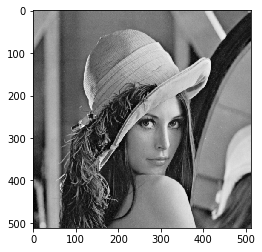

In [3]:
import imageio
from  matplotlib.pyplot import *

def rgb2gray(rgb):#noir et blanc pour faciliter les calculs
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

img = imageio.imread("lena_std.tif")
#Pour se simplifier la vie, on utilise du Grayscale
X1 =rgb2gray(img) #On decide que le canal rouge fera office de grayscale

figure(figsize=(4,4))
imshow(X1,cmap=cm.gray)

In [2]:
#Définissez convolution2D qui applique la convolution avec pour kernel H sur X.
#le résultat de la convolution est de même forme que X
#Choisissez comment vous voulez traiter le cas du bord.
def convolution2D(X,H):
    pass

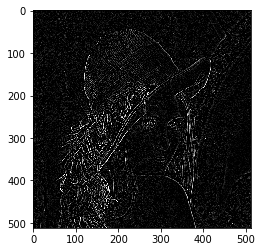

In [3]:
#Une fois votre fonction définie, ce code doit fonctionner

#Voici plusieurs types de kernel à appliquer sur l'image
#Vous pouvez aussi combiner plusieurs convolutions à la suite l'une de l'autre
#N'hésiter pas à en inventer ou rechercher des kernels courant sur le net


#H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening
#H=np.ones((3,3))*1.0/9 #blur
H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #edge detection
tmp=np.clip(convolution2D(X1,H),0,255 ) # np.clip permet de recadrer les valeurs de l'array entre [0,255] qui est l'intervalle des valeurs possibles pour des pixels
figure(figsize=(4,4))
imshow(tmp,cmap=cm.gray)


#BONUS: appliquez l'opération sur l'image RGB et non plus sur la grayscale.

# Segmentation d'image

Le but de la segmentation d'image est de regrouper les pixels appartenant à une même surface, à un même objet, à une région intéressante. Il existe plusieurs applications à segmentation: détection d'objets, post-processing, faire disparaitre l'objet d'une image,...

L'image suivante en montre un exemple.
![title](Segmentation.png)


Nous allons utiliser la segmentation afin de détecter où se trouve un document dans une image et ainsi pouvoir le remettre à plat sans devoir sélectionner manuellement les quatres coins du document. Par souci de simplicité, nous continuerons de travailler sur des images en noir et blanc. 

### Background Substraction
La technique de segmentation la plus simple est ce qu'on appelle le __Background Substraction__. Le principe est simple, une image est prise qui définira ce qu'est le background de l'image (le terrain de tennis dans l'exemple): $f(0)$. Ensuite, une image est prise lorsqu'un objet se déplace dedans (le joueur de tennis): $f(t)$. On peut détecter l'objet et sa position en soustrayant l'image avec l'objet de l'image sans l'objet.

$$P= |f(t)-f(0)| > Threshold$$

Dans P, on obtient la position des pixels où se trouve l'objet supposé. Le Threshold est mis en place afin de mitiger le problème du bruit d'acquisition des images ainsi qu'aux changements de luminosité de la scène.


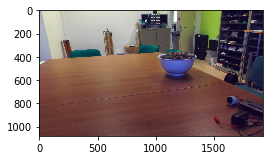

In [4]:
#On montre l'image de background

background=imageio.imread("./image/back1.png")
figure(figsize=(4,4))
imshow(background)
back=rgb2gray(background)#Noir et blanc pour simplifier les calculs

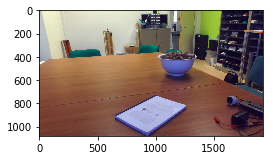

In [5]:
#On montre l'image avec le document

objet=imageio.imread("./image/obj1.png")
figure(figsize=(4,4))
imshow(objet)
objetb=rgb2gray(objet)#Noir et blanc pour simplifier les calculs

In [7]:

#Ecrivez la fonction de segmentation de l'objet (noir et blanc
#background et image étant des tableaux de forme (n,m).
#treshold est une valeur entre 0 et 255
#la fonction renvoie un tableau ayant comme forme (n,m). Les valeurs du tableaux sont à 0 lorsque la différence de background et image est en dessous de treshold
#et 1 lorsque la différence de background et image est plus grande que treshold
def foregroundDetect(background, image, treshold):
    pass

<IPython.core.display.Javascript object>


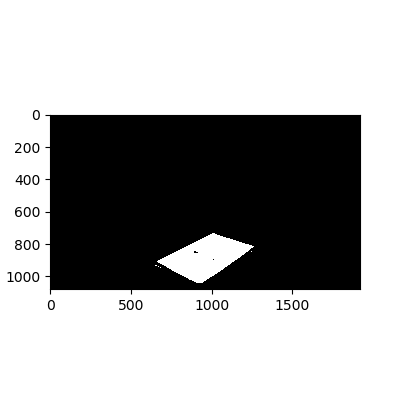

In [32]:
#Une fois votre fonction définie, ce code doit fonctionner

detect=foregroundDetect(back, objetb, 50)#modifiez treshold pour obtenir un résultat correct
figure(figsize=(4,4))
imshow(detect*255,cmap=cm.gray)

<IPython.core.display.Javascript object>


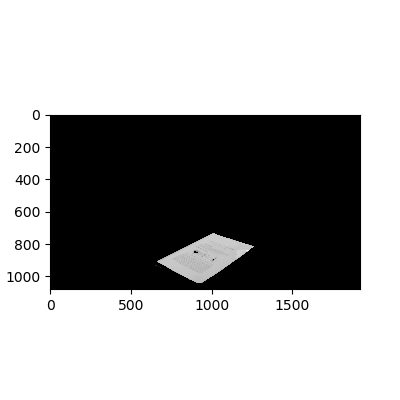

In [33]:
#celui-ci aussi
figure(figsize=(4,4))
imshow (np.multiply(objetb,detect),cmap=cm.gray)

## Amélioration de la segmentation
Ce premier algorithme nous a permis de localiser le document A4. Malheureusement, cette différence n'est pas très robuste aux changements de luminosité. comme le montre l'exemple suivant:

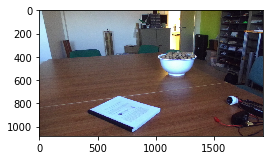

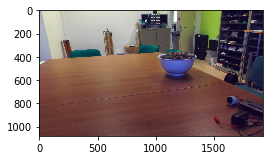

In [10]:
objet2=imageio.imread("./image/obj2.png")#changement de luminosité lors de la capture
objet2b=rgb2gray(objet2)
figure(figsize=(4,4))
imshow(objet2)

figure(figsize=(4,4))
imshow(background)


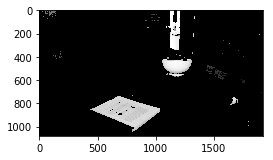

In [11]:
detect=foregroundDetect(back, objet2b, 100)#modifiez treshold pour obtenir un resultat correct
figure(figsize=(4,4))
imshow(detect*objet2b,cmap=cm.gray)#problème de segmentation


Il faut donc trouver un moyen de mitiger le problème du changement de luminosité. Pour cela, on prend plusieurs photos du background à différentes luminosités et on en crée une image de background moyenne.
$$B_{mean}=\frac{1}{N} \sum_{t=1}^{N} B(t)$$
$B(t)$ étant une image du background prise à l'instant t et $B_{mean}$ le background moyen.

Il suffit ensuite de faire la différence comme précédamment:
$$P= |f(t)-B_{mean}| > Threshold$$

In [12]:
#Définissiez meanBackground qui retourne une image de background moyen
#backgrounds est une liste d'image de background
def meanBackground(backgrounds):
    pass
    

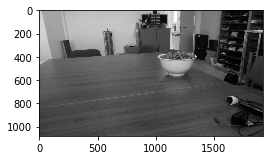

In [13]:
#Une fois votre fonction définie, ce code doit fonctionner

#création de la liste
backgrounds=[]
backgrounds.append(back)
backgrounds.append(rgb2gray(imageio.imread("./image/back2.png")))
backgrounds.append(rgb2gray(imageio.imread("./image/back3.png")))
backgrounds.append(rgb2gray(imageio.imread("./image/back4.png")))
backgrounds.append(rgb2gray(imageio.imread("./image/back5.png")))
#backgrounds.append(rgb2gray(imageio.imread("./image/back6.png")))
Bmean=meanBackground(backgrounds)
figure(figsize=(4,4))
imshow(Bmean,cmap=cm.gray)#doit montrer une image du background moyen

<IPython.core.display.Javascript object>


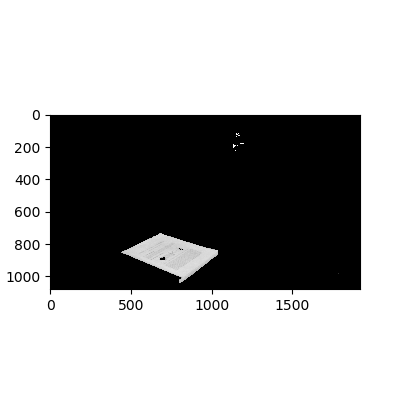

In [23]:
detect=foregroundDetect(Bmean, objet2b, 75)#modifiez treshold pour obtenir un resultat correct
figure(figsize=(4,4))
imshow(detect*objet2b,cmap=cm.gray)#problème de segmentation atténué


# Opérations morphologiques
Malgré un amélioration de la segmentation, il peut subsister du "bruit". Nous pouvons le supprimer grâce aux opérations morphologiques. Pour comprendre comment les opérations morpholigiques fonctionnent, lisez les slides __"MorphologicalOp.pdf"__.
Dans notre cas, pour réduire le bruit, nous voulons utiliser une opération de type __Opening__ qui est en fait une opération d'érosion suivie d'une opération de dilatation.

In [16]:
#definissez les fonctions erosion,dilatation et opening. 
#le premier argument étant une image binaire (composée de 0 et de 1), le deuxième étant l'élément structurant (équivalent du kernel pour une convolution) 

def erosion(X, H):
    pass
    
def dilatation(X, H):
    pass


def opening(bimage, kernel):
    pass




<IPython.core.display.Javascript object>


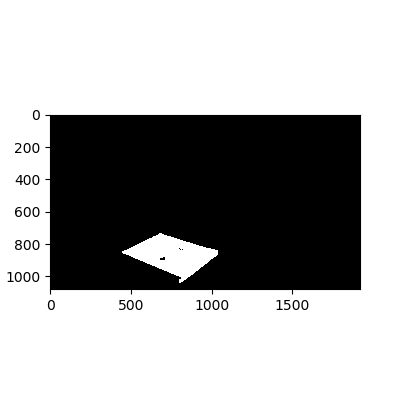

In [28]:
#Cette cellule devrait fonctionner une fois vos fonctions définies.
#Attention, cette opération peut prendre beaucoup du temps avec image en haute résolution
newdetect=opening(detect,np.ones((7,7)))
figure(figsize=(4,4))
imshow(newdetect*255,cmap=cm.gray)#Problème de segmentation réglé


Maintenant que nous avons retiré le bruit, il ne reste que les pixels appartenant au document. Nous pouvons donc en trouver les quatres coins. 

In [ ]:
#Obtenez les quatres coins du documents à partir de l'image segmentée
#la fonction np.nonzero peut être utile ainsi que np.argmin np.argmax
points = [[], []]#à remplir

<IPython.core.display.Javascript object>


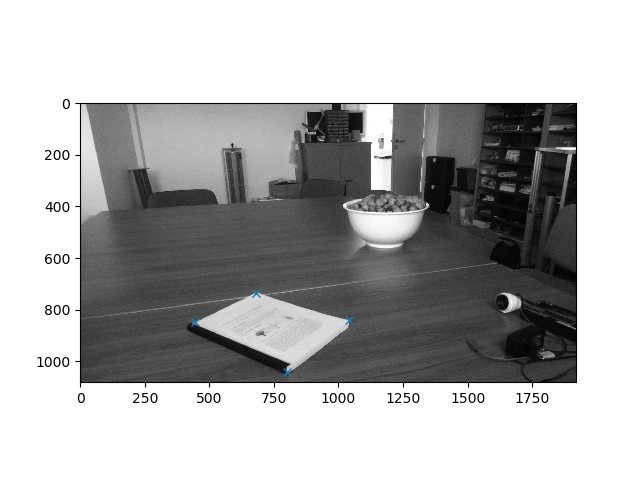

In [29]:
#une fois les points trouvés, ce code doit fonctionner
figure()
imshow(objet2b,cmap=cm.gray)
plot(points[0], points[1], "x")
show()

Nous avons les 4 points. Il est donc possible d'appliquer la résolution d'équations vue au labo précédent, afin de mettre à plat le document.

In [30]:
#code labo précédent

In [36]:
#code Labo précédent

<IPython.core.display.Javascript object>


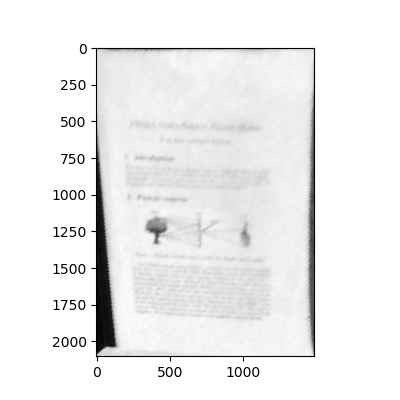

In [37]:
#résultat
figure(figsize=(4,4))
imshow(result,cmap=cm.gray)#document mis à plat